In [84]:
def slope(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return (y2 - y1) / (x2 - x1)

# a x + b = y
# ax + b - y = 0
# ax - y = -b

def line(p1, p2):
    a = slope(p1, p2)
    b = -a * p1[0] + p1[1]
    return (a,b)

def intersection(l1, l2):
    a, c = l1
    b, d = l2
    
    return ((d - c) / (a - b)), ((a*d - b*c)/(a - b))

def above(pt, line):
    return pt[1] > line[0] * pt[0] + line[1]

def below(pt, line):
        return pt[1] < line[0] * pt[0] + line[1]

def upper_bound(pt, gamma):
    return (pt[0], pt[1] + gamma)

def lower_bound(pt, gamma):
    return (pt[0], pt[1] - gamma)

class GreedyPLR:
    def __init__(self, gamma):
        self.__state = "need2"
        self.__gamma = gamma
        
    def process(self, pt):
        self.__last_pt = pt
        if self.__state == "need2":
            self.__s0 = pt
            self.__state = "need1"
        elif self.__state == "need1":
            self.__s1 = pt
            self.__setup()
            self.__state = "ready"
        elif self.__state == "ready":
            return self.__process(pt)
        else:
            assert False
    
    def __setup(self):
        self.__rho_lower = line(upper_bound(self.__s0, self.__gamma),
                                lower_bound(self.__s1, self.__gamma))
        self.__rho_upper = line(lower_bound(self.__s0, self.__gamma),
                                upper_bound(self.__s1, self.__gamma))
        
        self.__sint = intersection(self.__rho_lower, self.__rho_upper)
        
    def __current_segment(self):
        segment_start = self.__s0[0]
        segment_stop = self.__last_pt[0]
        avg_slope = (self.__rho_lower[0] + self.__rho_upper[0]) / 2
        intercept = -avg_slope * self.__sint[0] + self.__sint[1]
        return (segment_start, segment_stop, avg_slope, intercept)
        
    def __process(self, pt):
        if not (above(pt, self.__rho_lower) and below(pt, self.__rho_upper)):
            # we have to start a new segment.
            prev_segment = self.__current_segment()
            
            self.__s0 = pt
            self.__state = "need1"
            
            # return the previous segment
            return prev_segment
        
        # we can tweak our extreme slopes to account for this point.
        # if this point's upper bound is below the current rho_upper,
        # we have to change rho_upper.

        s_upper = upper_bound(pt, self.__gamma)
        s_lower = lower_bound(pt, self.__gamma)
        if below(s_upper, self.__rho_upper):
            self.__rho_upper = line(self.__sint, s_upper)
        
        # if this point's lower bound is above the current rho_lower,
        # we have to change rho_lower
        if above(s_lower, self.__rho_lower):
            self.__rho_lower = line(self.__sint, s_lower)
            
        return None
    
    def finish(self):
        if self.__state == "need2":
            self.__state = "finished"
            return None
        elif self.__state == "need1":
            self.__state = "finished"
            return (self.__s0[0], self.__s0[0] + 1, 0, self.__s0[1])
        elif self.__state == "ready":
            self.__state = "finished"
            return self.__current_segment()
        else:
            assert False
        


    Key Num  Block Num
0     1.000          0
1   487.493          1
2   884.032          2
3  1343.270          3
4  1840.540          4
   x_start     slope         y
0        1  0.002056 -0.002056
1      884  0.002178  0.075002
2     1840  0.001555  1.137840
3     2957  0.001338  2.042090
4     4156  0.002728 -3.340170
884.0 2957.0
1840.0 4156.0
2957.0 5153.0
4156.0 6151.0
5153.0 7103.0
6151.0 8001.0
7103.0 8853.0
8001.0 9567.0
8853.0 10741.0
9567.0 11542.0


IndexError: single positional indexer is out-of-bounds

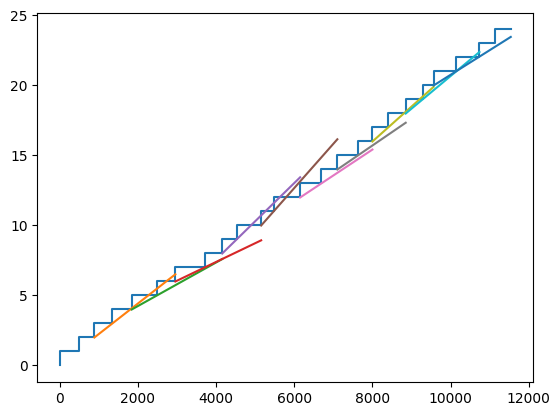

In [85]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def get_y(x,slope,c):
    return slope* x + c
# Read the CSV files
data1 = pd.read_csv("original_data.csv")
data2 = pd.read_csv('plr_data.csv')
print(data1.head())
print(data2.head())


# Plot the data from the two CSV files
plt.step(data1["Key Num"], data1["Block Num"], where="pre")

# Plot the plr lines
for i, r in data2.iloc[1:].iterrows():
    if i != len(data2.iloc[1:]):
        # np.linespace(r[0], next_row[0],10)
        next_row = next(data2.iloc[i+1:].iterrows())[1]
        xl = np.linspace(r[0], ,10)
    else:
        xl = np.linspace(r[0],r[0]+1,10)
    yl = r[1] * xl + r[2]
    plt.plot(xl,yl)

# for row in df:
#     xl = np.linspace()
# Add labels and title
plt.xlabel('Block Start Key (ordered)')
plt.ylabel('Block #')
plt.legend()

# Display the plot
plt.show()

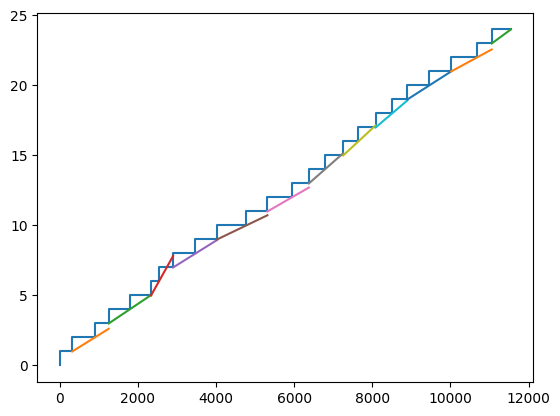

In [ ]:
plr = GreedyPLR(0.0005)
lines = []
for i,pt in data1.iloc[1::].iterrows():
    l = plr.process((float(pt[0]), float(pt[1])))
    if l:
        lines.append(l)
    
last = plr.finish()
if last:
    lines.append(last)


len(lines)

plt.step(data1["Key Num"], data1["Block Num"], where="pre")
for l in lines:
    xl = np.linspace(l[0], l[1], 10)
    yl = l[2] * xl + l[3]
    plt.plot(xl,yl)